In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
import matplotlib.image as mpimg

In [88]:
Snake_dat = mpimg.imread('Snakes_Dataset/corn_snake/corn_snake_261.jpg')

In [89]:
Snake_dat

array([[[189, 177, 179],
        [191, 179, 181],
        [184, 173, 177],
        ...,
        [121, 106, 111],
        [110,  98, 100],
        [116, 104, 106]],

       [[179, 167, 169],
        [189, 177, 179],
        [195, 184, 188],
        ...,
        [135, 127, 125],
        [116, 108, 106],
        [ 95,  90,  86]],

       [[179, 167, 169],
        [157, 145, 147],
        [167, 156, 160],
        ...,
        [112, 118, 104],
        [113, 119, 105],
        [101, 107,  93]],

       ...,

       [[139, 127, 137],
        [183, 171, 181],
        [179, 167, 177],
        ...,
        [157, 153, 167],
        [162, 163, 167],
        [202, 206, 205]],

       [[162, 150, 160],
        [141, 129, 139],
        [185, 173, 183],
        ...,
        [175, 177, 192],
        [167, 172, 176],
        [180, 189, 188]],

       [[164, 152, 162],
        [155, 143, 153],
        [133, 121, 131],
        ...,
        [184, 190, 206],
        [162, 171, 176],
        [179, 189, 190]]

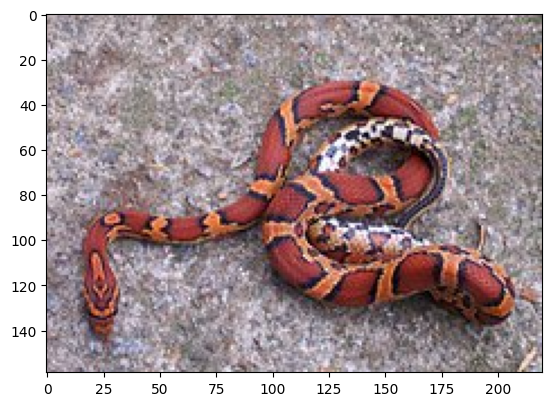

In [90]:
plt.imshow(Snake_dat)

In [91]:
Snake_dat.shape

(159, 220, 3)

In [92]:
X = []
y = []
needed_classes = ["corn_snake", "milk_snake", "California_kingsnake","grass_snake"]
label = {"corn_snake": 0,
         "milk_snake": 1,
         "California_kingsnake": 2,
         "grass_snake": 3
}
for i in os.listdir('Snakes_Dataset/'):
    if i not in needed_classes:  
        continue
    for j in os.listdir(f'Snakes_Dataset//{i}/'):
      try:
        image = mpimg.imread(f'Snakes_Dataset//{i}/{j}')
        image = image / 255
        image = cv2.resize(image, (159, 220))
        image = image.reshape(159, 220, 3)
        X.append(image)
        y.append(label[i])
      except:
        continue
X = np.array(X)
y = np.array(y)

In [93]:
X

array([[[[0.25882353, 0.25098039, 0.25490196],
         [0.25490196, 0.24705882, 0.25098039],
         [0.25725737, 0.24941423, 0.2533358 ],
         ...,
         [0.27843137, 0.27058824, 0.2745098 ],
         [0.27843137, 0.27058824, 0.2745098 ],
         [0.27843137, 0.27058824, 0.2745098 ]],

        [[0.27843137, 0.27058824, 0.2745098 ],
         [0.27843137, 0.27058824, 0.2745098 ],
         [0.27843137, 0.27058824, 0.2745098 ],
         ...,
         [0.29019608, 0.24705882, 0.23921569],
         [0.28803798, 0.24490073, 0.23705759],
         [0.28627451, 0.24313725, 0.23529412]],

        [[0.28235294, 0.24313725, 0.23529412],
         [0.28627451, 0.24705882, 0.23921569],
         [0.27058824, 0.25098039, 0.23921569],
         ...,
         [0.2688057 , 0.26096257, 0.27272727],
         [0.28449198, 0.28449198, 0.29233512],
         [0.28877005, 0.28877005, 0.29661319]],

        ...,

        [[0.63600713, 0.59286988, 0.52228164],
         [0.64535701, 0.59829819, 0.53555309]

In [94]:
y

array([2, 2, 2, ..., 1, 1, 1], shape=(1616,))

In [95]:
X.shape

(1616, 159, 220, 3)

In [96]:
y.shape

(1616,)

In [97]:
from keras.utils import to_categorical

In [98]:
y = to_categorical(y)

In [99]:
y

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], shape=(1616, 4))

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
X_train.shape

(1292, 159, 220, 3)

In [103]:
X_test.shape

(324, 159, 220, 3)

In [104]:
y_train.shape

(1292, 4)

In [105]:
y_test.shape

(324, 4)

In [130]:
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import Adam
from keras.layers import Dropout

In [131]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(5,5), activation='relu',input_shape=(159, 220, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=4,activation='softmax'))

In [132]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

In [133]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20)

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 27s 620ms/step - accuracy: 0.2492 - loss: 1.3934 - val_accuracy: 0.3241 - val_loss: 1.3734
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 26s 641ms/step - accuracy: 0.2848 - loss: 1.3775 - val_accuracy: 0.2870 - val_loss: 1.3723
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 26s 644ms/step - accuracy: 0.3367 - loss: 1.3559 - val_accuracy: 0.3889 - val_loss: 1.2736
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 27s 649ms/step - accuracy: 0.4296 - loss: 1.2316 - val_accuracy: 0.5741 - val_loss: 1.0675
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 27s 657ms/step - accuracy: 0.4698 - loss: 1.1626 - val_accuracy: 0.5494 - val_loss: 1.0636
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 27s 648ms/step - accuracy: 0.5341 - loss: 1.0925 - val_accuracy: 0.5494 - val_loss: 1.0236
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3022s 76s/step - accuracy: 0.5101 - loss: 1.0872 - val_accuracy: 0.5216 - val_loss: 1.1138
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 30s 726ms/step - accuracy: 0.5588 - loss: 1.0396 - val_accu

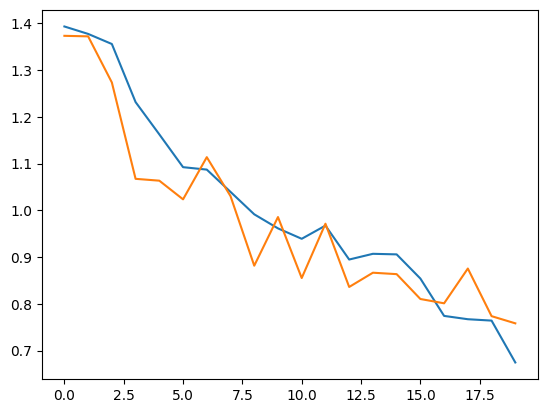

In [134]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])

In [135]:
Snake_dat = mpimg.imread('corn-snake-from-the-lower-florida-keys-530475947-588124bc5f9b58bdb3ec9f93.jpg')

In [137]:
Snake_dat.shape

(2592, 3888, 3)

In [144]:
img = cv2.imread('corn-snake-from-the-lower-florida-keys-530475947-588124bc5f9b58bdb3ec9f93.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   
img = cv2.resize(img, (220, 159))           
img = img / 255                           
img = np.expand_dims(img, axis=0)            
pred = model.predict(img)
print(pred)
print("Tesak", np.argmax(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[0.73616827 0.2598983  0.00241059 0.00152285]]
Tesak 0


In [145]:
import pickle

In [147]:
with open ('model.odz','wb') as file:
    pickle.dump(model, file)

In [148]:
!pip install labelImg

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.9 MB ? eta -:--:--
 

  DEPRECATION: Building 'labelImg' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'labelImg'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [152]:
!pip install PyQt6

   ---------------------------------------- 0.0/25.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/25.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/25.7 MB ? eta -:--:--
   - -------------------------------------- 0.8/25.7 MB 1.3 MB/s eta 0:00:19
   - -------------------------------------- 1.0/25.7 MB 1.4 MB/s eta 0:00:18
   -- ------------------------------------- 1.3/25.7 MB 1.5 MB/s eta 0:00:17
   -- ------------------------------------- 1.6/25.7 MB 1.4 MB/s eta 

In [153]:
!pip install --upgrade pyQt6 lxml

In [158]:
git clone https://github.com/heartexlabs/labelImg.git

SyntaxError: invalid syntax (4200764541.py, line 1)

In [157]:
!python labelImg.py

C:\Users\user\AppData\Local\Programs\Python\Python311\python.exe: can't open file 'C:\\Users\\user\\Desktop\\ML (1)\\Neyron\\labelImg.py': [Errno 2] No such file or directory
